In [2]:
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import pmdarima as pm

In [4]:
data = pd.read_csv(r'C:\Users\begba\Desktop\p\BTC-USD_2.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [5]:
Date1 = data['Date']
Price = data['Open']
new_data = []
new_data.append(pd.DataFrame({'Date':Date1,
                              'Price': Price
                              }))
new_data_df = pd.concat(new_data)
new_data_df.head()

,Date,Price
0,2015-01-01,320.434998
1,2015-01-02,314.079010
2,2015-01-03,314.846008
3,2015-01-04,281.145996
4,2015-01-05,265.084015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3034 non-null   object 
 1   Price   3034 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.5+ KB


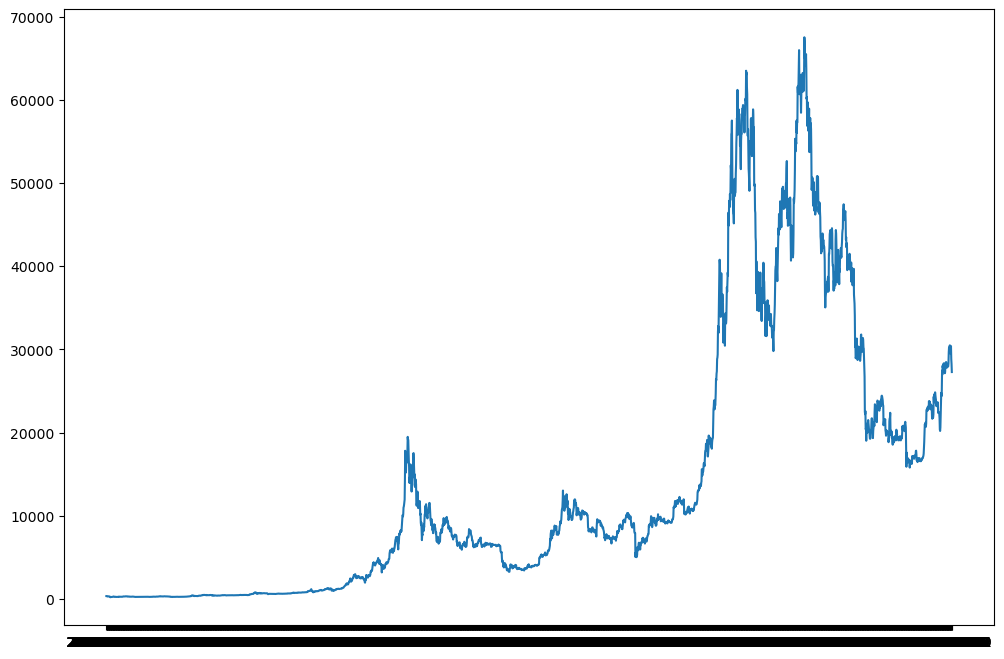

In [6]:
new_data_df.dropna(inplace=True)
new_data_df.info()
fig, ax = plt.subplots(figsize=(12,8), dpi=100)
ax.plot(new_data_df['Date'], (new_data_df['Price']))

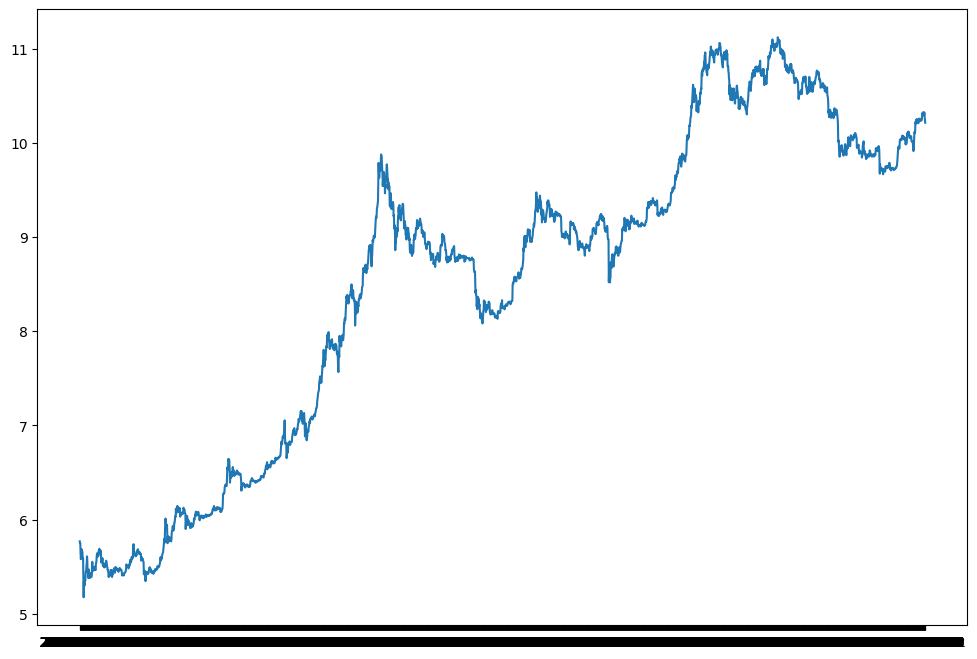

In [7]:
new_data_df['Price'] = np.log(new_data_df['Price'])

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
ax.plot(new_data_df['Date'], (new_data_df['Price']))

In [8]:
def adf_test(target_series):
   result = adfuller(target_series)
   adf_statistic = result[0]
   p_value = result[1]
   print('ADF Statistic: %f' % adf_statistic)
   print('p-value: %f' % p_value)
   return adf_statistic, p_value

def kpss_test(target_series):
   print( "Results of KPSS Test:")
   kpsstest = kpss(target_series, regression="ct", nlags="auto")
   kpss_output = pd.Series(
       kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"])
   for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
   print(kpss_output)
# get adf statistic and p-value of ADF test
adf_statistic, p_value = adf_test(new_data_df['Price'])
# get p-value for kpss
kpss_test(new_data_df['Price'])


ADF Statistic: -1.266041
p-value: 0.644562
Results of KPSS Test:
Test Statistic            1.029343
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


D:\conda\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [10]:
new_data_df['Price_dif'] = new_data_df['Price'].diff()
new_data_df

,Date,Price,Price_dif
0,2015-01-01,5.769679,NaN
1,2015-01-02,5.749645,-0.020035
2,2015-01-03,5.752084,0.002439
3,2015-01-04,5.638874,-0.113210
4,2015-01-05,5.580047,-0.058827
...,...,...,...
3029,2023-04-18,10.290418,-0.029050
3030,2023-04-19,10.322007,0.031588
3031,2023-04-20,10.268953,-0.053054
3032,2023-04-21,10.248821,-0.020131


In [11]:
new_data_df.dropna(inplace = True)


In [12]:
new_data_df

,Date,Price,Price_dif
1,2015-01-02,5.749645,-0.020035
2,2015-01-03,5.752084,0.002439
3,2015-01-04,5.638874,-0.113210
4,2015-01-05,5.580047,-0.058827
5,2015-01-06,5.615356,0.035309
...,...,...,...
3029,2023-04-18,10.290418,-0.029050
3030,2023-04-19,10.322007,0.031588
3031,2023-04-20,10.268953,-0.053054
3032,2023-04-21,10.248821,-0.020131


In [13]:
def adf_test(target_series):
   result = adfuller(target_series)
   adf_statistic = result[0]
   p_value = result[1]
   print('ADF Statistic: %f' % adf_statistic)
   print('p-value: %f' % p_value)
   return adf_statistic, p_value

def kpss_test(target_series):
   print( "Results of KPSS Test:")
   kpsstest = kpss(target_series, regression="ct", nlags="auto")
   kpss_output = pd.Series(
       kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"])
   for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
   print(kpss_output)
# get adf statistic and p-value of ADF test
adf_statistic, p_value = adf_test(new_data_df['Price_dif'])
# get p-value for kpss
kpss_test(new_data_df['Price_dif'])

ADF Statistic: -56.114681
p-value: 0.000000
Results of KPSS Test:
Test Statistic           0.084043
p-value                  0.100000
Lags Used                7.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
Critical Value (2.5%)    0.176000
Critical Value (1%)      0.216000
dtype: float64


D:\conda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


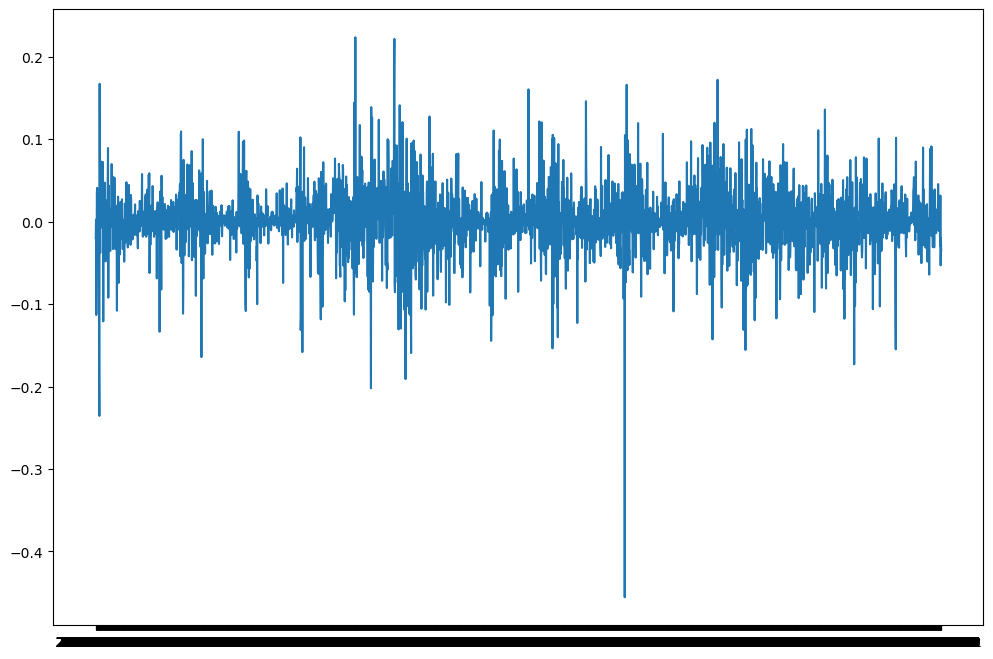

In [14]:
fig, ax = plt.subplots(figsize=(12,8), dpi=100)
ax.plot(new_data_df['Date'], (new_data_df['Price_dif']))

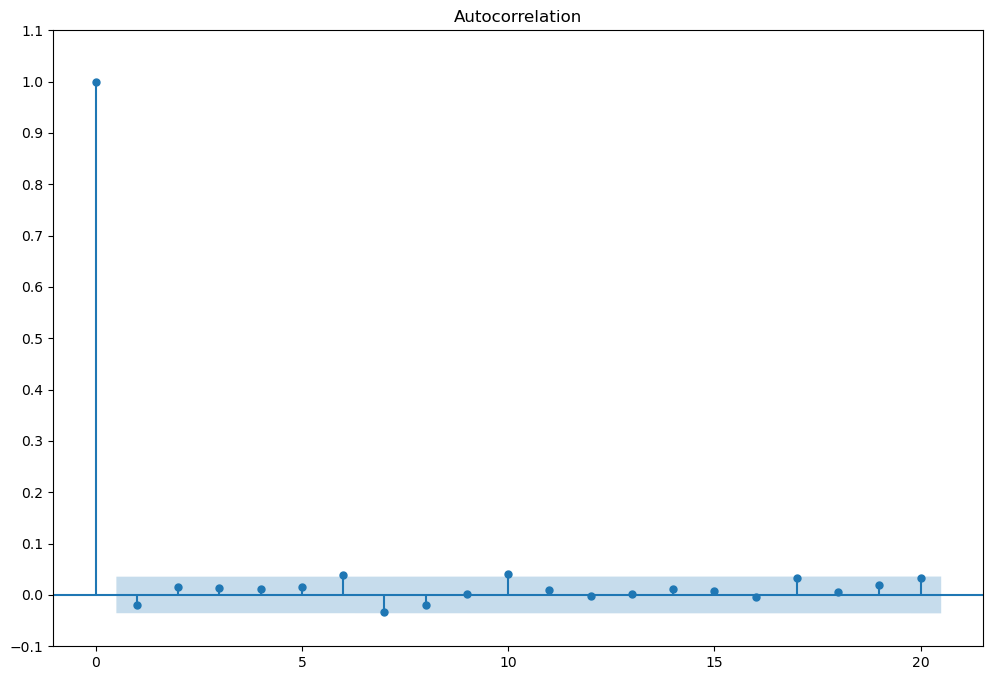

D:\conda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


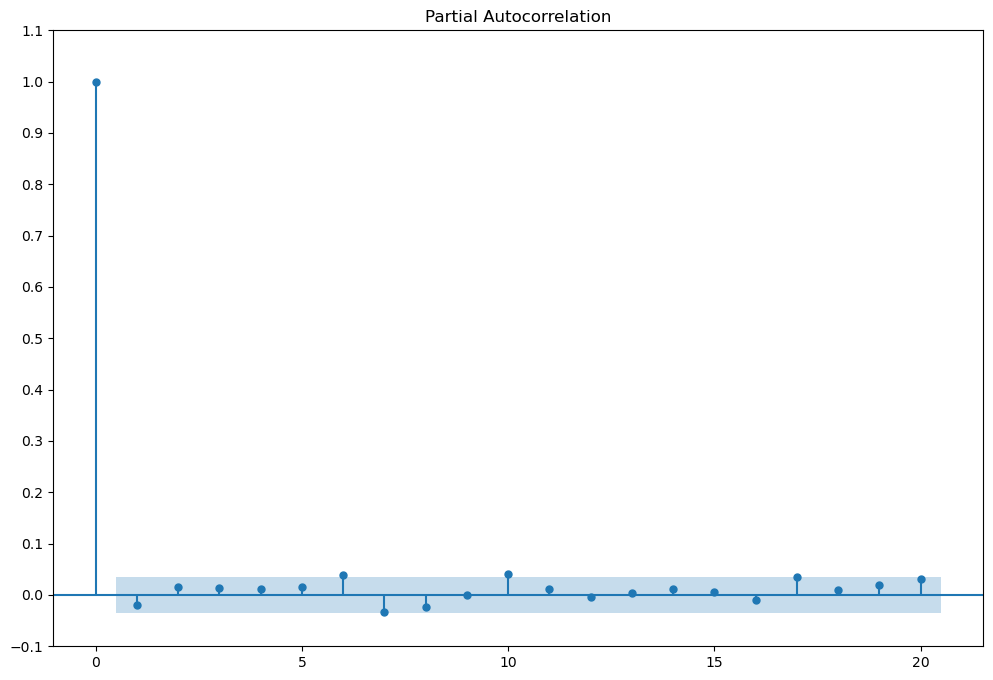

In [15]:
fig, ax = plt.subplots(1, figsize=(12,8), dpi=100)
plot_acf(new_data_df['Price_dif'], lags=20, ax=ax)
plt.ylim([-0.05, 0.25])
plt.yticks(np.arange(-0.10,1.1,0.1))
plt.show()

fig, ax = plt.subplots(1, figsize=(12,8), dpi=100)
plot_pacf(new_data_df['Price_dif'], lags=20, ax=ax)
plt.ylim([-0.05, 0.25])
plt.yticks(np.arange(-0.10,1.1,0.1))
plt.show()

In [18]:
sm.stats.acorr_ljungbox(new_data_df['Price_dif'], lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,27.005276,0.135116


In [20]:
data = pd.read_csv(r'C:\Users\begba\Desktop\p\BTC-USD_2.csv')

Date1 = data['Date']
Price = data['Open']
new = []
new.append(pd.DataFrame({'Date':Date1,
                              'Price': Price
                              }))
new_dat = pd.concat(new)
new_dat.head()

,Date,Price
0,2015-01-01,320.434998
1,2015-01-02,314.079010
2,2015-01-03,314.846008
3,2015-01-04,281.145996
4,2015-01-05,265.084015


In [21]:
def auto_arima(new_dat):
    new_dat = np.log(new_dat['Price'])
    model = pm.auto_arima(new_dat,
                          start_p=10,
                          start_q=10,
                          test='adf',
                          max_p=10, 
                          max_q=10, 
                          m=1,
                          d=None,           
                          seasonal=False,   
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True,
                         stepwise = True)
    # difference df by d found by auto arima
    differenced_by_auto_arima = new_dat.diff(model.order[1])
    return model.order, differenced_by_auto_arima, model.resid()

model_order, differenced_data, model_residuals = auto_arima(new_dat)

Performing stepwise search to minimize aic
 ARIMA(10,1,10)(0,0,0)[0] intercept   : AIC=-11165.460, Time=31.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11178.446, Time=0.67 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11177.579, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11177.544, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11176.009, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11175.685, Time=0.89 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 35.036 seconds


In [22]:
sm.stats.acorr_ljungbox(model_residuals, lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,10.258422,0.96324


In [23]:
import pandas as pd
import json
import pmdarima as pm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import datetime

D:\conda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


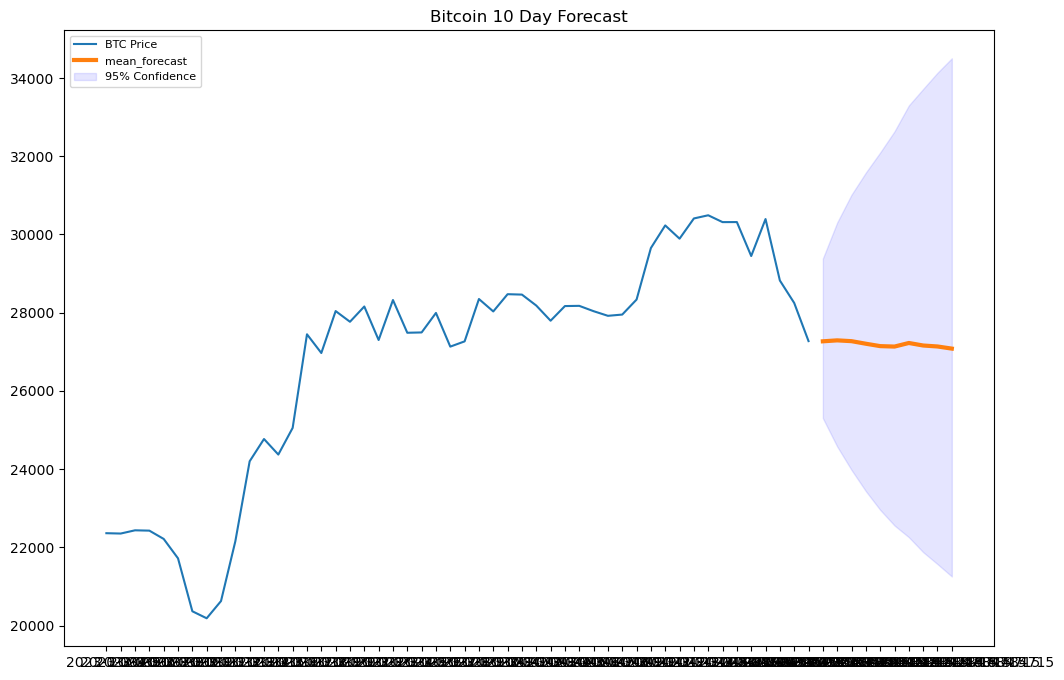

In [24]:
model = sm.tsa.arima.ARIMA(np.log(new_dat['Price']), order = (10,1,10))
fitted = model.fit()
fc = fitted.get_forecast(10)
 
#Set confidence to 95% 
fc = (fc.summary_frame(alpha=0.05))
#Get mean forecast
fc_mean = fc['mean']
#Get lower confidence forecast
fc_lower = fc['mean_ci_lower']
#Get upper confidence forecast
fc_upper = fc['mean_ci_upper'] 
#Set figure size
plt.figure(figsize=(12,8), dpi=100)
#Plot last 50 price movements
plt.plot(new_dat['Date'][-50:],new_dat['Price'][-50:], label='BTC Price')
# create date axis for predictions
future_10_days =  [str(datetime.datetime.today() + datetime.timedelta(days=x)) for x in range(10)]
#Plot mean forecas
plt.plot(future_10_days, np.exp(fc_mean), label='mean_forecast', linewidth = 3)
#Create confidence interval
plt.fill_between(future_10_days, np.exp(fc_lower),np.exp(fc_upper), color='b', alpha=.1, label = '95% Confidence')
#Set title
plt.title('Bitcoin 10 Day Forecast')
#Set legend
plt.legend(loc='upper left', fontsize=8)
plt.show()

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


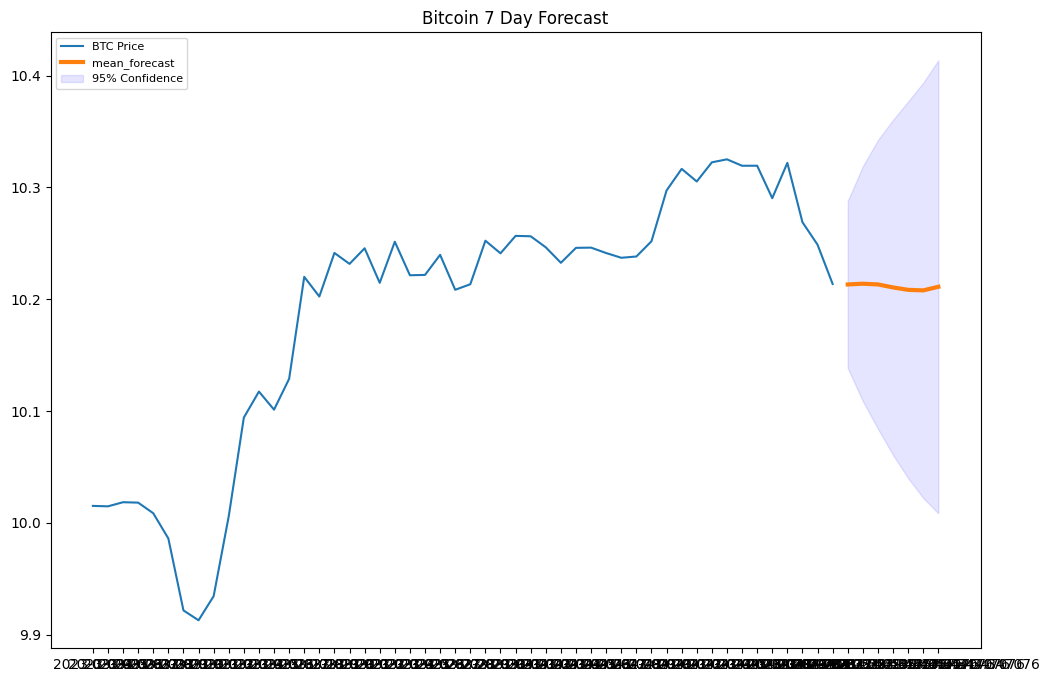

In [54]:
model = sm.tsa.arima.ARIMA(np.log(new_dat['Price']), order = (10,1,10))
fitted = model.fit()
fc = fitted.get_forecast(10)
 
#Set confidence to 95% 
fc = (fc.summary_frame(alpha=0.05))
#Get mean forecast
fc_mean = fc['mean']
#Get lower confidence forecast
fc_lower = fc['mean_ci_lower']
#Get upper confidence forecast
fc_upper = fc['mean_ci_upper'] 
#Set figure size
plt.figure(figsize=(12,8), dpi=100)
#Plot last 50 price movements
plt.plot(new_dat['Date'][-50:],np.log(new_dat['Price'][-50:]), label='BTC Price')
# create date axis for predictions
future_10_days =  [str(datetime.datetime.today() + datetime.timedelta(days=x)) for x in range(10)]
#Plot mean forecas
plt.plot(future_10_days, fc_mean, label='mean_forecast', linewidth = 3)
#Create confidence interval
plt.fill_between(future_10_days, fc_lower,fc_upper, color='b', alpha=.1, label = '95% Confidence')
#Set title
plt.title('Bitcoin 10 Day Forecast')
#Set legend
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [25]:
#arch garch model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [26]:
df = pd.read_csv(r'C:\Users\begba\Desktop\p\BTC-USD_2.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.resample('D').last().fillna(method='ffill')

In [27]:
# split data into train and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [28]:
model = arch_model(train_data['Close'], vol='ARCH', p=1)
results = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 34526.75281013599
Iteration:      2,   Func. Count:     10,   Neg. LLF: 24583.993003714964
Iteration:      3,   Func. Count:     14,   Neg. LLF: 24583.322641590603
Iteration:      4,   Func. Count:     18,   Neg. LLF: 24583.2783372798
Iteration:      5,   Func. Count:     22,   Neg. LLF: 24583.21623018613
Iteration:      6,   Func. Count:     26,   Neg. LLF: 24583.04874131196
Iteration:      7,   Func. Count:     30,   Neg. LLF: 24582.600543226556
Iteration:      8,   Func. Count:     34,   Neg. LLF: 24581.417764919126
Iteration:      9,   Func. Count:     38,   Neg. LLF: 24578.20397644169
Iteration:     10,   Func. Count:     42,   Neg. LLF: 24569.20695904999
Iteration:     11,   Func. Count:     46,   Neg. LLF: 24545.947665489723
Iteration:     12,   Func. Count:     50,   Neg. LLF: 24471.579539090515
Iteration:     13,   Func. Count:     54,   Neg. LLF: 24324.61475735328
Iteration:     14,   Func. Count:     58,   Neg. LLF: 24233

D:\conda\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.643e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [40]:
print(preds.mean.columns)


Index(['h.001', 'h.002', 'h.003', 'h.004', 'h.005', 'h.006', 'h.007', 'h.008',
       'h.009', 'h.010',
       ...
       'h.598', 'h.599', 'h.600', 'h.601', 'h.602', 'h.603', 'h.604', 'h.605',
       'h.606', 'h.607'],
      dtype='object', length=607)


In [42]:
print(df.isna().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [46]:
rmse = np.sqrt(np.mean((test_data['Close'] - preds.mean['h.001']) ** 2))
print('RMSE: %.3f' % rmse)



RMSE: nan


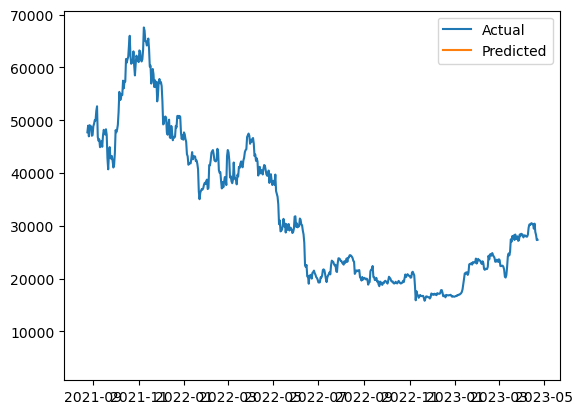

In [48]:
plt.plot(test_data['Close'], label='Actual')
plt.plot(preds.mean['h.001'], label='Predicted')
plt.legend()
plt.show()

In [49]:
# define GARCH model and fit to training data
model = arch_model(train_data['Close'], vol='GARCH', p=1, q=1)
results = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 81113.70006075759
Iteration:      2,   Func. Count:     12,   Neg. LLF: 24152.90823348402
Iteration:      3,   Func. Count:     17,   Neg. LLF: 24148.553941996062
Iteration:      4,   Func. Count:     22,   Neg. LLF: 24145.21274649754
Iteration:      5,   Func. Count:     27,   Neg. LLF: 24144.77459523444
Iteration:      6,   Func. Count:     32,   Neg. LLF: 24144.725259061954
Iteration:      7,   Func. Count:     37,   Neg. LLF: 24144.52446264121
Iteration:      8,   Func. Count:     42,   Neg. LLF: 24144.117457827473
Iteration:      9,   Func. Count:     47,   Neg. LLF: 24142.906820799937
Iteration:     10,   Func. Count:     52,   Neg. LLF: 24139.73926622988
Iteration:     11,   Func. Count:     57,   Neg. LLF: 24131.219286031446
Iteration:     12,   Func. Count:     62,   Neg. LLF: 24108.24560534655
Iteration:     13,   Func. Count:     67,   Neg. LLF: 24046.903557023958
Iteration:     14,   Func. Count:     72,   Neg. LLF: 2394

D:\conda\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.643e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [50]:
# generate predictions on test data
preds = results.forecast(horizon=len(test_data))

D:\conda\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [51]:
rmse = np.sqrt(np.mean((test_data['Close'] - preds.mean['h.001']) ** 2))
print('RMSE: %.3f' % rmse)

RMSE: nan


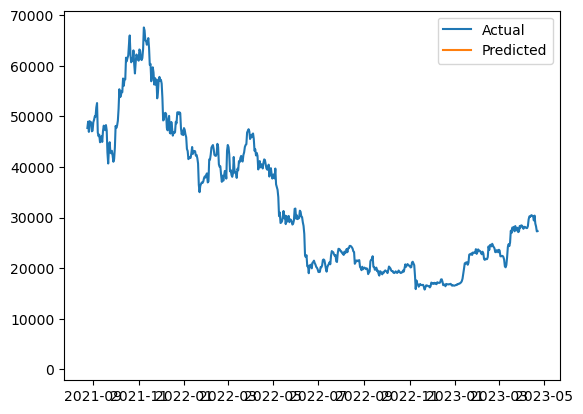

In [53]:
# plot predictions and actual data
plt.plot(test_data['Close'], label='Actual')
plt.plot(preds.mean['h.001'], label='Predicted')
plt.legend()
plt.show()

In [54]:
# state space model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [55]:
# define the order of the model parameters
p = 1
d = 1
q = 1

In [56]:
# create the SARIMAX model
model = SARIMAX(train_data['Close'], order=(p, d, q))


In [57]:
# fit the model to the training data
results = model.fit()

In [58]:
# forecast the test data using the fitted model
preds = results.forecast(steps=len(test_data))

In [59]:
# calculate root mean squared error (RMSE) of predictions
rmse = np.sqrt(np.mean((test_data['Close'] - preds) ** 2))
print('RMSE: %.3f' % rmse)

RMSE: 21734.159


In [ ]:
# a SARIMAX model with p=1, d=1, and q=1 parameters, 
#which represent the autoregression, differencing, 
#and moving average terms, respectively. We've then used the fit() method to fit 
#the model to the training data and the forecast() method to generate forecasts for the test data

In [60]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

In [61]:
close_prices = df['Close'].values

In [62]:
# compute power spectral density using Welch's method
freq, psd = signal.welch(close_prices, nperseg=1024)

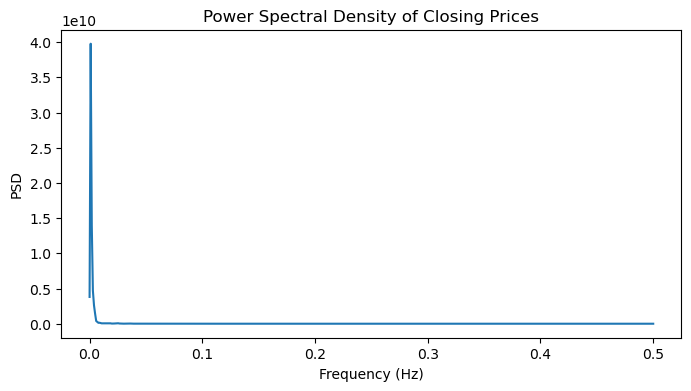

In [63]:
# plot power spectral density
plt.figure(figsize=(8, 4))
plt.plot(freq, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Power Spectral Density of Closing Prices')
plt.show()